
# Solar cell extraction comparison

The goal of this notebook is to compare the output of the extraction with Sasha's method and Jeremy's method.

In [1]:
import os, sys
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy import constants as const

from solarcell_dataset import SolarCellDataSet, SolarCellRun, calculate_npulses, get_info_from_filename, estimate_noise, get_solarcell_total_charge

%matplotlib notebook

/home/jneveu/stardice/analysis/cbp_paper


In [2]:
data_dir = "/data/STARDICE/cbp/solarcell/ut20210719"
other_str = "Angle_0"
nbursts = 5

run = SolarCellRun(directory_path=data_dir, tag=other_str, nbursts=nbursts)
run.load_from_file(os.path.join(data_dir, f"QSWMax_EMPTY_Angle_0_ntuple_old20210725.npy"))
nt = run.data

run2 = SolarCellRun(directory_path=data_dir, tag=other_str, nbursts=nbursts)
run2.load_from_file(os.path.join(data_dir, f"QSWMax_EMPTY_Angle_0_ntuple.npy"))
nt2 = run2.data

<IPython.core.display.Javascript object>


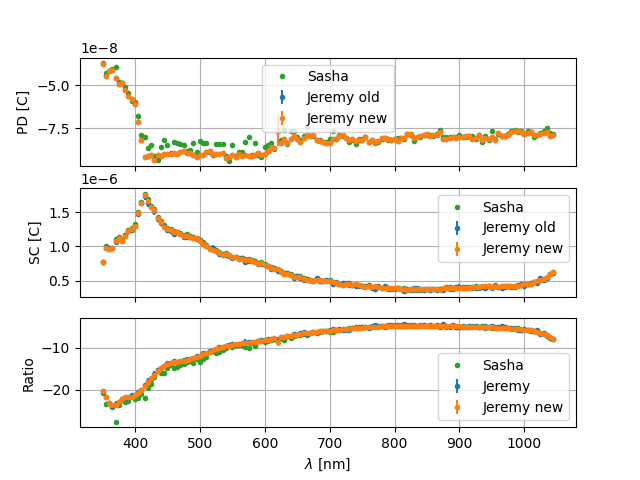

In [12]:
csv = np.loadtxt(os.path.join(data_dir, "QSWMax_EMPTY_Angle0SC_charges.csv"), skiprows=1, delimiter=",")
wl1 = csv.T[0]
charge_sc = 5*csv.T[1] * const.e.value * 1e6
csv = np.loadtxt(os.path.join(data_dir, "QSWMax_EMPTY_Angle0PD_charges.csv"), skiprows=1, delimiter=",")
wl2 = csv.T[0]
charge_pd = -5*csv.T[1] * const.e.value * 1e6

fig, ax = plt.subplots(3, 1, sharex="all")
ax[0].errorbar(nt["set_wl"], nt["pd_charge_total"], yerr=nt["pd_charge_total_err"], linestyle="none",
               markersize=3, marker="o", label="Jeremy old")
ax[0].errorbar(nt2["set_wl"], nt2["pd_charge_total"], yerr=nt["pd_charge_total_err"], linestyle="none",
               markersize=3, marker="o", label="Jeremy new")
ax[0].plot(wl2, charge_pd, "o", markersize=3, label="Sasha")
ax[1].errorbar(nt["set_wl"], nt["sc_charge_total"], yerr=nt["sc_charge_total_err"], linestyle="none",
               markersize=3, marker="o", label="Jeremy old")
ax[1].errorbar(nt2["set_wl"], nt2["sc_charge_total"], yerr=nt2["sc_charge_total_err"], linestyle="none",
               markersize=3, marker="o", label="Jeremy new")
ax[1].plot(wl1, charge_sc, "o", markersize=3, label="Sasha")
ratio = nt["sc_charge_total"] / nt["pd_charge_total"]
ratio_err = ratio * np.sqrt((nt["sc_charge_total_err"] / nt["sc_charge_total"]) ** 2
                                      + (nt["pd_charge_total_err"] / nt["pd_charge_total"]) ** 2)
ax[2].errorbar(nt["set_wl"], ratio, yerr=ratio_err, linestyle="none",
               markersize=3, marker="o", label="Jeremy")
ratio = nt2["sc_charge_total"] / nt2["pd_charge_total"]
ratio_err = ratio * np.sqrt((nt2["sc_charge_total_err"] / nt2["sc_charge_total"]) ** 2
                                      + (nt2["pd_charge_total_err"] / nt2["pd_charge_total"]) ** 2)
ax[2].errorbar(nt2["set_wl"], ratio, yerr=ratio_err, linestyle="none",
               markersize=3, marker="o", label="Jeremy new")
ax[2].plot(wl2, np.interp(wl2, wl1, charge_sc) / charge_pd, "o", markersize=3, label="Sasha")
for i in range(3):
    ax[i].legend()
    ax[i].grid()
ax[0].set_ylabel("PD [C]")
ax[1].set_ylabel("SC [C]")
ax[2].set_ylabel("Ratio")
ax[2].set_xlabel(r"$\lambda$ [nm]")
plt.show()


In [4]:
run2.load()

100%|██████████| 140/140 [00:05<00:00, 27.46it/s]


<IPython.core.display.Javascript object>


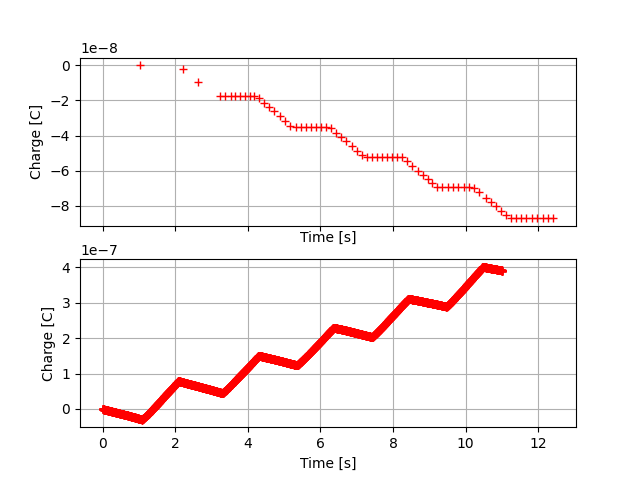

In [18]:
d = run2.get_data_set(620, 5)
d.plot_data_set()

<IPython.core.display.Javascript object>


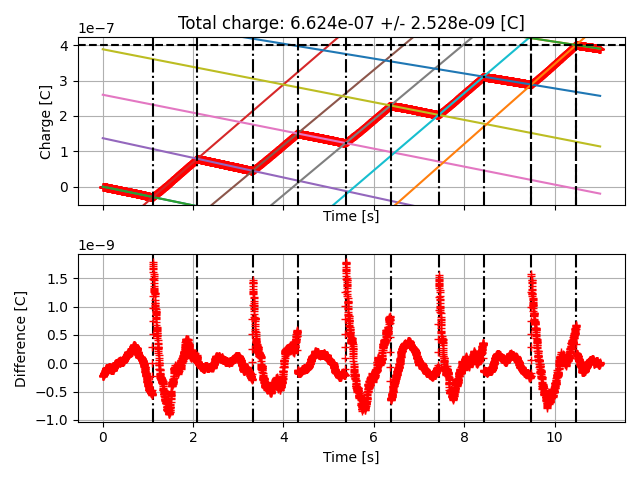

In [19]:
noise = 0.01*estimate_noise(d.sc.data["time"], d.sc.data["charge"], length=20)
err = noise * np.ones_like(d.sc.data["time"])
charge_sc, charge_sc_err, i_k1, i_k2, pvals_sc, indices_sc = get_solarcell_total_charge(
    d.sc.data["time"],
    d.sc.data["charge"], d.get_time_breaks(),
    err=err, plot=True)


In [20]:
d.get_time_breaks()

array([ 1.0911,  2.0921,  3.3033,  4.3043,  5.3574,  6.3584,  7.4234,
        8.4244,  9.4735, 10.472 ])